In [9]:
pip install -r requirements.txt


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      
      *** Please install the `scikit-image` package (instead of `skimage`) ***
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


train_image_data = pd.read_csv('features.csv')

# Load the metadata file and concatenate it with the image data by id

metadata = pd.read_csv('train.csv')

# concatenate the metadata with the image data by Id collumn, drop the Pawpularity column from the metadata
train_data = pd.merge(train_image_data, metadata.drop('Pawpularity', axis=1), on='Id', how='outer')
train_data.head()


,Id,gabor_mean,haralick_0,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,...,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,0007de18844b0dbbb5e1f607da0606e0,41.231567,0.000157,1278.492804,0.690157,2060.880358,0.062406,298.598931,6965.028630,8.182493,...,1,1,0,0,1,0,0,0,0,0
1,0009c66b9439883ba2750fb825e1d7db,23.987915,0.000773,457.965407,0.925960,3091.327100,0.281047,191.414256,11907.342991,8.376357,...,1,0,0,0,0,0,0,0,0,0
2,0013fd999caf9a3efe1352ca1b0d937e,24.436279,0.000233,724.338070,0.891415,3337.386293,0.116865,233.633501,12625.207100,8.503799,...,1,1,0,0,0,0,1,1,0,0
3,0018df346ac9c1d8413cfcc888ca8246,26.991699,0.000493,598.241637,0.880039,2493.181218,0.201182,313.177373,9374.483237,8.374829,...,1,1,0,0,0,0,0,0,0,0
4,001dc955e10590d3ca4673f034feeef2,39.300049,0.000133,1450.048193,0.750709,2908.689995,0.067109,258.257568,10184.711786,8.591187,...,0,1,0,0,1,0,0,0,0,0


In [7]:

# Get the name of the columns starting with hog_
feature_names = train_image_data.columns
feature_names

Index(['Id', 'gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2',
       'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7',
       'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12',
       'saturation', 'lbp_mean', 'total_entropy', 'mean_red', 'mean_green',
       'mean_blue', 'variance_red', 'variance_green', 'variance_blue',
       'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31',
       'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35',
       'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19',
       'Pawpularity'],
      dtype='object')

In [14]:
X = train_data.iloc[:, 1:-1] #except the last and the first(Id)
y = train_data['Pawpularity']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (7929, 55)
y_train shape: (7929,)
X_val shape: (1983, 55)
y_val shape: (1983,)


C:\Users\HP\AppData\Local\Temp\ipykernel_19604\4022925016.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


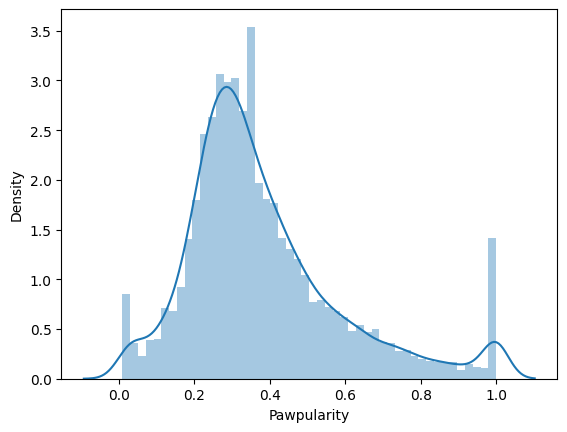

Total number of outliers:  221


C:\Users\HP\AppData\Local\Temp\ipykernel_19604\4022925016.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(of_y_train)


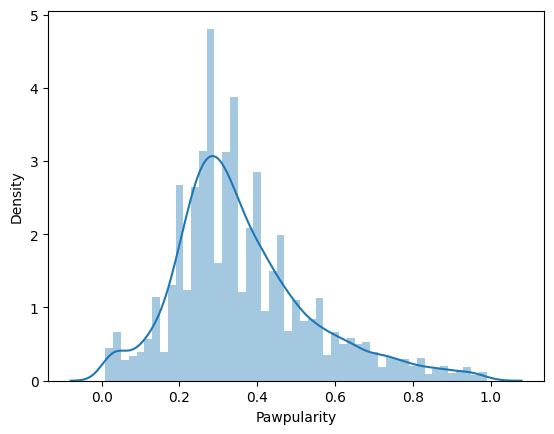

Mean before outlier removal: 0.38036196241644593
Standard deviation before outlier removal: 0.2048104984883986
Mean after outlier removal: 0.3625960041515309
Standard deviation after outlier removal: 0.17839826539114023


In [25]:
from scipy.stats import zscore
# Remove the outliers from the training set

# Plot the target variable distribution
sns.distplot(y_train)
plt.show()

# Identify the outliers
outliers = [x for x in y_train if x >= 1]
print("Total number of outliers: ", len(outliers))

# Remove the outliers from the features
of_X_train = X_train[y_train < 1]

# Remove the outliers
of_y_train = y_train[y_train < 1]

# Plot the target distribution again to see if the outliers have been removed
sns.distplot(of_y_train)
plt.show()

# Print statistics before and after removing the outliers
print("Mean before outlier removal:", np.mean(y_train))
print("Standard deviation before outlier removal:", np.std(y_train))
print("Mean after outlier removal:", np.mean(of_y_train))
print("Standard deviation after outlier removal:", np.std(of_y_train))

Selected Features: Index(['haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4',
       'haralick_6', 'haralick_9', 'haralick_11', 'haralick_12', 'lbp_mean',
       'hog_49', 'hog_28', 'hog_41', 'hog_50', 'hog_91', 'hog_19',
       'Pawpularity', 'Subject Focus'],
      dtype='object')
Coefficients: [-4.13780671e-16 -1.41287467e-06 -4.00832124e-16  5.65149868e-06
 -4.70886016e-16 -1.41287467e-06  3.27134956e-13  6.71860913e-16
  1.02083956e-14  9.98572385e-17  1.89554752e-17 -6.00758438e-17
 -1.00091303e-16 -1.19359683e-16  1.09210608e-16 -3.45758993e-16
  1.00000000e+00  1.33154232e-16]
Mean squared error: 0.00000
Coefficient of determination: 1.00000


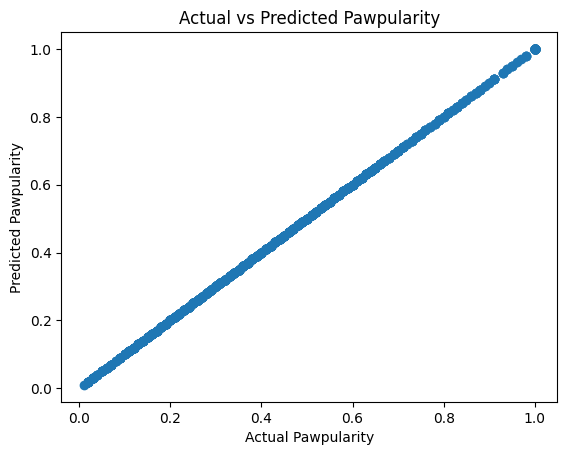

In [16]:
from sklearn.feature_selection import RFE

# Train the model
model = LinearRegression()
rfe=RFE(model,n_features_to_select=18)
x_rfe=rfe.fit_transform(of_X_train,of_y_train)
#get the selected features
selected_features = X.columns[rfe.support_]
model.fit(of_X_train[selected_features], of_y_train)

# Make predictions
y_pred = model.predict(X_val[selected_features])

# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

# Plot the predictions against the actual values
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()

This looks too good to be true - overfitting? data leakage?
Lets do some cross validation

In [17]:
# Perform cross validation on the training set
from sklearn.model_selection import cross_val_score

X = train_data.iloc[:, 1:-1]
y = train_data['Pawpularity']

# Test the model with cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross validation scores: ", scores)
print("Average cross-validation scroe: ", scores.mean())

Cross validation scores:  [1. 1. 1. 1. 1.]
Average cross-validation scroe:  1.0


In [ ]:
# Train the model on the entire training set
model.fit(X, y)


In [ ]:
conda install -c conda-forge::mahotas

: 

In [13]:
from img_ft_extract import feat_extract

# Get a list with the Ids of the images in the test set
test_ids = pd.read_csv('test.csv')['Id']

# Extract the features from the test set
test_image_data = feat_extract(test_ids)
test_image_data.head()

ModuleNotFoundError: No module named 'mahotas'